In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import matplotlib.dates as dates

In [34]:
%matplotlib inline

### 使用 `requests.get` 调用 API 接口，获得原始数据

In [35]:
# get data by api
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36 Edg/101.0.1210.47'
}
limit = 60
province = '上海'
resp = requests.get("https://api.inews.qq.com/newsqa/v1/query/pubished/daily/list?province={province}&limit={limit}".format(province=province, limit=limit), headers)

### 将数据转换成JSON格式

In [37]:
resJson = resp.json()
data = resJson['data']
data

[{'year': 2022,
  'date': '03.20',
  'country': '中国',
  'province': '上海',
  'confirm': 5027,
  'dead': 7,
  'heal': 4472,
  'confirm_add': '41',
  'confirm_cuts': '',
  'dead_cuts': '',
  'now_confirm_cuts': '',
  'heal_cuts': '',
  'newConfirm': 41,
  'newHeal': 44,
  'newDead': 0,
  'description': '',
  'wzz': 2793,
  'wzz_add': 734,
  '_mtime': '2022-03-20T23:56:27Z',
  'all_local_confirm_add': 0,
  'deadAdd': 0},
 {'year': 2022,
  'date': '03.21',
  'country': '中国',
  'province': '上海',
  'confirm': 5066,
  'dead': 7,
  'heal': 4612,
  'confirm_add': '39',
  'confirm_cuts': '',
  'dead_cuts': '',
  'now_confirm_cuts': '',
  'heal_cuts': '',
  'newConfirm': 39,
  'newHeal': 140,
  'newDead': 0,
  'description': '',
  'wzz': 3505,
  'wzz_add': 865,
  '_mtime': '2022-03-22T00:09:27Z',
  'all_local_confirm_add': 0,
  'deadAdd': 0},
 {'year': 2022,
  'date': '03.22',
  'country': '中国',
  'province': '上海',
  'confirm': 5080,
  'dead': 7,
  'heal': 4635,
  'confirm_add': '14',
  'confirm_c

### 将得到的JSON数据转换为DataFrame

In [39]:
# load into dataframe
df = pd.DataFrame(data)
df.head()

,year,date,country,province,confirm,dead,heal,confirm_add,confirm_cuts,dead_cuts,...,heal_cuts,newConfirm,newHeal,newDead,description,wzz,wzz_add,_mtime,all_local_confirm_add,deadAdd
0,2022,03.20,中国,上海,5027,7,4472,41,,,...,,41,44,0,,2793,734,2022-03-20T23:56:27Z,0,0
1,2022,03.21,中国,上海,5066,7,4612,39,,,...,,39,140,0,,3505,865,2022-03-22T00:09:27Z,0,0
2,2022,03.22,中国,上海,5080,7,4635,14,,,...,,14,23,0,,4408,977,2022-03-23T00:04:22Z,0,0
3,2022,03.23,中国,上海,5094,7,4716,14,,,...,,14,81,0,,5170,979,2022-03-23T23:56:29Z,0,0
4,2022,03.24,中国,上海,5135,7,4779,41,,,...,,41,63,0,,6750,1580,2022-03-25T00:16:54Z,0,0


### 将数据保存为csv文件

In [40]:
# save to csv
df.to_csv("covoid-data.csv", index=  False )

### 使用 PANDAS 读取Csv文件数据

In [41]:
# read csv data
df2 = pd.read_csv("covoid-data.csv")

In [42]:
# 查看数据
df2.head()

,year,date,country,province,confirm,dead,heal,confirm_add,confirm_cuts,dead_cuts,...,heal_cuts,newConfirm,newHeal,newDead,description,wzz,wzz_add,_mtime,all_local_confirm_add,deadAdd
0,2022,3.20,中国,上海,5027,7,4472,41,NaN,NaN,...,NaN,41,44,0,NaN,2793,734,2022-03-20T23:56:27Z,0,0
1,2022,3.21,中国,上海,5066,7,4612,39,NaN,NaN,...,NaN,39,140,0,NaN,3505,865,2022-03-22T00:09:27Z,0,0
2,2022,3.22,中国,上海,5080,7,4635,14,NaN,NaN,...,NaN,14,23,0,NaN,4408,977,2022-03-23T00:04:22Z,0,0
3,2022,3.23,中国,上海,5094,7,4716,14,NaN,NaN,...,NaN,14,81,0,NaN,5170,979,2022-03-23T23:56:29Z,0,0
4,2022,3.24,中国,上海,5135,7,4779,41,NaN,NaN,...,NaN,41,63,0,NaN,6750,1580,2022-03-25T00:16:54Z,0,0


### 查看DataFrame的基础信息

In [43]:
#查看数据类型
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   60 non-null     int64  
 1   date                   60 non-null     float64
 2   country                60 non-null     object 
 3   province               60 non-null     object 
 4   confirm                60 non-null     int64  
 5   dead                   60 non-null     int64  
 6   heal                   60 non-null     int64  
 7   confirm_add            60 non-null     int64  
 8   confirm_cuts           0 non-null      float64
 9   dead_cuts              0 non-null      float64
 10  now_confirm_cuts       0 non-null      float64
 11  heal_cuts              0 non-null      float64
 12  newConfirm             60 non-null     int64  
 13  newHeal                60 non-null     int64  
 14  newDead                60 non-null     int64  
 15  descript

In [45]:
# 生成 datetime 列
df2['date_time'] = df2['year'].astype(str) + '.' +  df2['date'].astype(str)
df2['date_time'] = df2['date_time'].str.strip().str.replace('.', '/', regex=False)
df2['date_time'].head()

0     2022/3/2
1    2022/3/21
2    2022/3/22
3    2022/3/23
4    2022/3/24
Name: date_time, dtype: object

In [46]:
# 将新的column 转换为 datetime
df2['date_time'] = pd.to_datetime(df2['date_time'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   60 non-null     int64         
 1   date                   60 non-null     float64       
 2   country                60 non-null     object        
 3   province               60 non-null     object        
 4   confirm                60 non-null     int64         
 5   dead                   60 non-null     int64         
 6   heal                   60 non-null     int64         
 7   confirm_add            60 non-null     int64         
 8   confirm_cuts           0 non-null      float64       
 9   dead_cuts              0 non-null      float64       
 10  now_confirm_cuts       0 non-null      float64       
 11  heal_cuts              0 non-null      float64       
 12  newConfirm             60 non-null     int64         
 13  newHeal

In [48]:
df2[['date_time', 'confirm',  'confirm_add', 'wzz', 'wzz_add']].head()

,date_time,confirm,confirm_add,wzz,wzz_add
0,2022-03-02,5027,41,2793,734
1,2022-03-21,5066,39,3505,865
2,2022-03-22,5080,14,4408,977
3,2022-03-23,5094,14,5170,979
4,2022-03-24,5135,41,6750,1580


In [49]:
# 中文字体设置
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

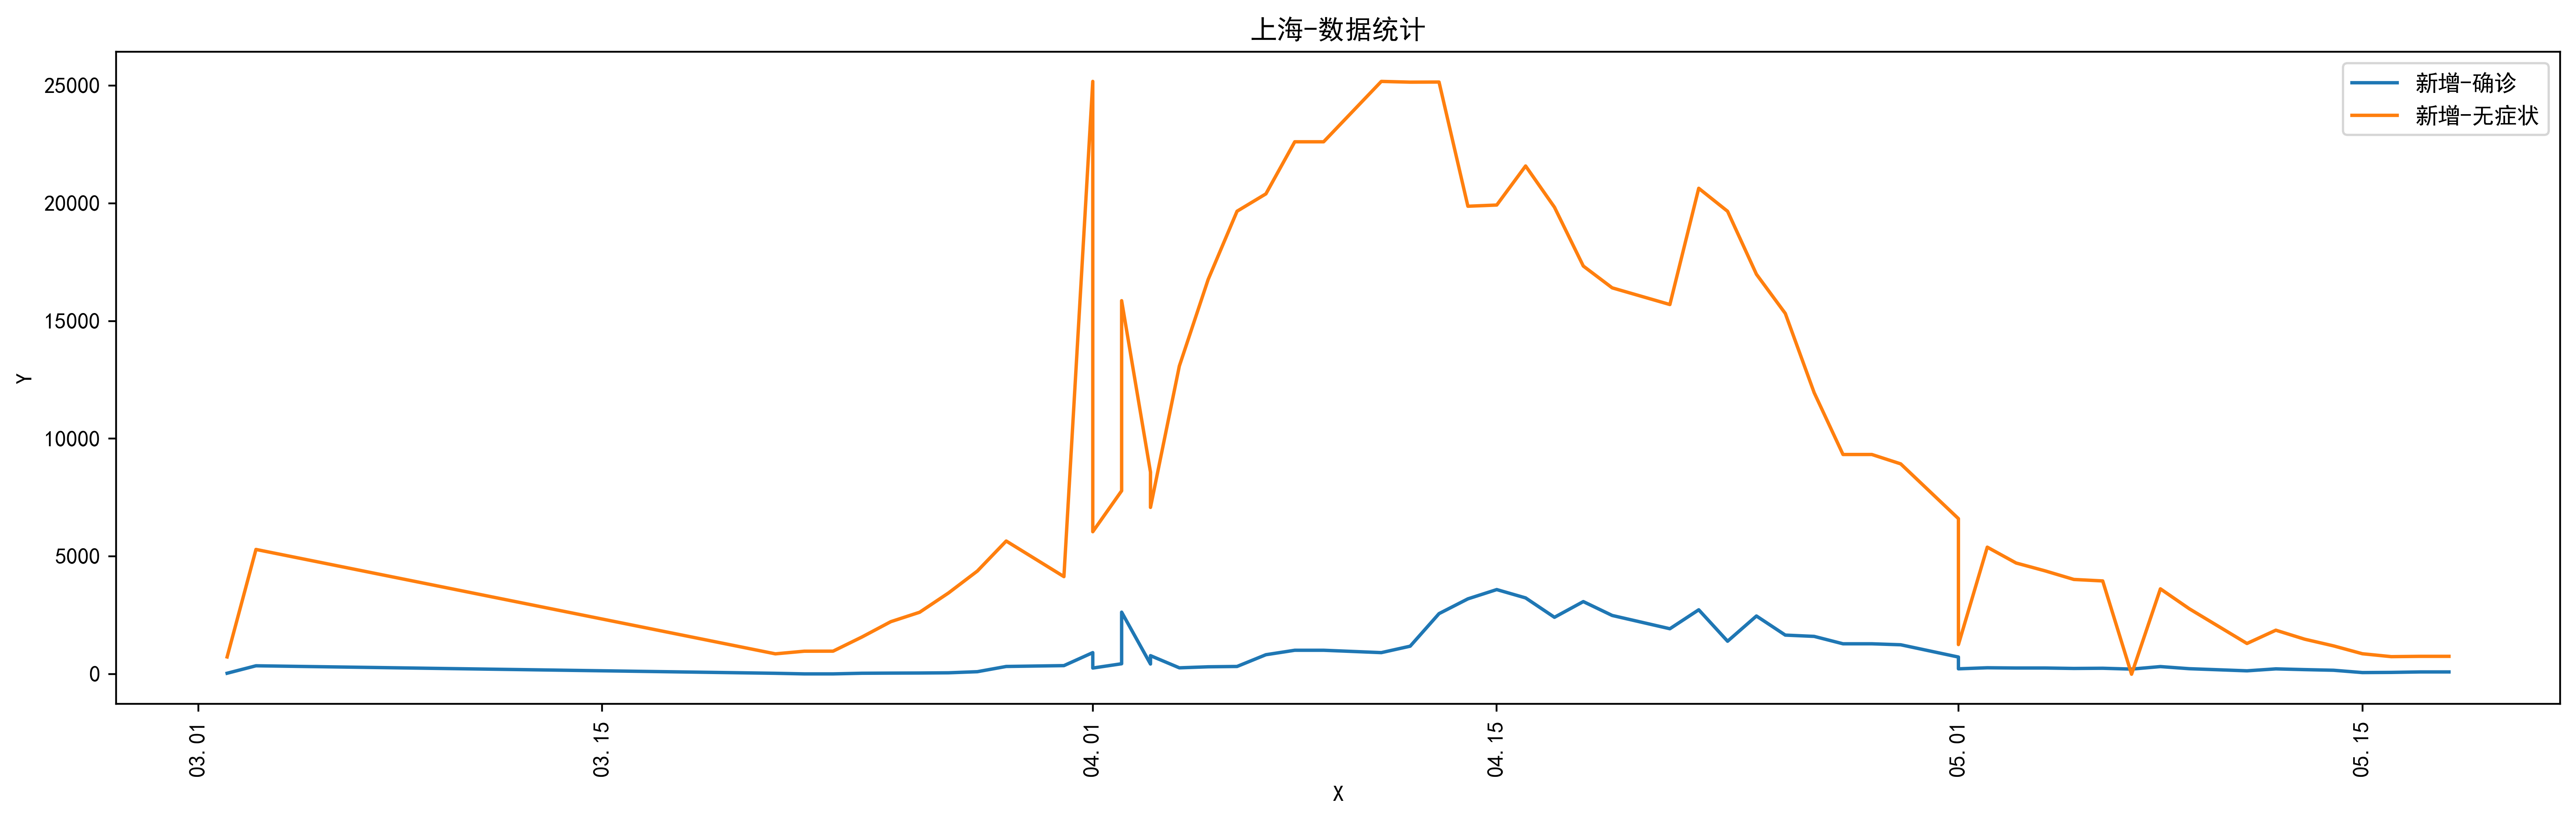

In [50]:
# 绘制新增确诊确诊数量的趋势图
fig = plt.figure(figsize=(15,4),dpi=400)
ax = fig.add_axes([0.1,0.1,1,1])


ax.xaxis.set_major_locator(dates.AutoDateLocator())
# dates.DateFormatter('%m.%d')
ax.xaxis.set_major_formatter(dates.DateFormatter('%m.%d'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("{}-数据统计".format(province))
# 按日期降序
df3 = df2.sort_values(by='date_time', ascending=False)
# 刻度设置
plt.xticks(rotation='vertical')

ax.plot(df3['date_time'], df3['confirm_add'], label ='新增-确诊')

ax.plot(df3['date_time'], df3['wzz_add'], label ='新增-无症状')

ax.legend()


## Great Job!